# MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN
import sklearn.preprocessing as preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import statsmodels.formula.api as smf

In [3]:
import plotly.express as px

In [4]:
df = pd.read_csv('df_f1.csv',index_col='id')
df

,price,sqft_living,sqft_lot,sqft_basement,lat,long,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,condition_4,condition_5,grade_fair,grade_good,grade_excellent,yr_built_early_century,yr_built_mid_century,yr_built_modern,yr_built_post_modern,has_renovated_1
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,1180,5650,0,47.5112,-122.257,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
6414100192,538000.0,2570,7242,400,47.7210,-122.319,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
5631500400,180000.0,770,10000,0,47.7379,-122.233,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2487200875,604000.0,1960,5000,910,47.5208,-122.393,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0
1954400510,510000.0,1680,8080,0,47.6168,-122.045,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936000429,1010000.0,3510,7200,910,47.5537,-122.398,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2997800021,475000.0,1310,1294,130,47.5773,-122.409,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
263000018,360000.0,1530,1131,0,47.6993,-122.346,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   20747 non-null  float64
 1   sqft_living             20747 non-null  int64  
 2   sqft_lot                20747 non-null  int64  
 3   sqft_basement           20747 non-null  int64  
 4   lat                     20747 non-null  float64
 5   long                    20747 non-null  float64
 6   bedrooms_2              20747 non-null  int64  
 7   bedrooms_3              20747 non-null  int64  
 8   bedrooms_4              20747 non-null  int64  
 9   bedrooms_5              20747 non-null  int64  
 10  bedrooms_6              20747 non-null  int64  
 11  bathrooms_1.5           20747 non-null  int64  
 12  bathrooms_1.75          20747 non-null  int64  
 13  bathrooms_2.0           20747 non-null  int64  
 14  bathrooms_2.25          2

In [6]:
df1 = pd.read_csv('df.csv',index_col='id')
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,has_renovated,grade_bins,yr_bins
id,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0,1955,98178,47.5112,-122.257,0,fair,mid_century
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,1951,98125,47.7210,-122.319,0,fair,mid_century
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0,1933,98028,47.7379,-122.233,0,dropped,early_century
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910,1965,98136,47.5208,-122.393,0,fair,mid_century
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0,1987,98074,47.6168,-122.045,0,good,modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7936000429,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,3,9,910,2009,98136,47.5537,-122.398,0,good,post_modern
2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,130,2008,98116,47.5773,-122.409,0,good,post_modern
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0,2009,98103,47.6993,-122.346,0,good,post_modern


In [7]:
df = df.rename(columns={'bathrooms_1.5':'bathrooms_1_5','bathrooms_1.75':"bathrooms_1_75",'bathrooms_2.0':'bathrooms_2','bathrooms_2.25':'bathrooms_2_25','bathrooms_2.5':'bathrooms_2_5','bathrooms_2.75':'bathrooms_2_75','bathrooms_3.0':'bathrooms_3','bathrooms_3.25':'bathrooms_3_25','bathrooms_3.5':'bathrooms_3_5','bathrooms_3.75':'bathrooms_3_75','bathrooms_4.0':'bathrooms_4','bathrooms_4.25':'bathrooms_4_25','floors_1.5':'floors_1_5','floors_2.0':'floors_2','floors_3.0':'floors_3','waterfront_1.0':'waterfront_1','view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20747 entries, 7129300520 to 291310100
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   20747 non-null  float64
 1   sqft_living             20747 non-null  int64  
 2   sqft_lot                20747 non-null  int64  
 3   sqft_basement           20747 non-null  int64  
 4   lat                     20747 non-null  float64
 5   long                    20747 non-null  float64
 6   bedrooms_2              20747 non-null  int64  
 7   bedrooms_3              20747 non-null  int64  
 8   bedrooms_4              20747 non-null  int64  
 9   bedrooms_5              20747 non-null  int64  
 10  bedrooms_6              20747 non-null  int64  
 11  bathrooms_1_5           20747 non-null  int64  
 12  bathrooms_1_75          20747 non-null  int64  
 13  bathrooms_2             20747 non-null  int64  
 14  bathrooms_2_25          2

In [9]:
df.to_csv('df_no_zip')

In [10]:
outcome = 'price'
predictors = df.drop('price',axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [11]:
formula

'price~sqft_living+sqft_lot+sqft_basement+lat+long+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bathrooms_1_5+bathrooms_1_75+bathrooms_2+bathrooms_2_25+bathrooms_2_5+bathrooms_2_75+bathrooms_3+bathrooms_3_25+bathrooms_3_5+bathrooms_3_75+bathrooms_4+bathrooms_4_25+floors_1_5+floors_2+floors_3+waterfront_1+view_1+view_2+view_3+view_4+condition_4+condition_5+grade_fair+grade_good+grade_excellent+yr_built_early_century+yr_built_mid_century+yr_built_modern+yr_built_post_modern+has_renovated_1'

## MODEL 1

In [12]:
model = ols(formula=formula,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1161.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:17:49   Log-Likelihood:            -2.8047e+05
No. Observations:               20747   AIC:                         5.610e+05
Df Residuals:                   20706   BIC:                         5.613e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.555e+07   1.41e+06    -25.226      0.000   -3.83e+07   -3.28e+07
sqft_living              171.9850      3.184     54.010      0.000     165.744     178.227
sqft_lot                   0.0331      0.033      1.003      0.316      -0.032       0.098
sqft_basement            -34.1340      4.166     -8.193      0.000     -42.301     -25.967
lat                     5.895e+05   9614.790     61.317      0.000    5.71e+05    6.08e+05
long                   -6.267e+04   1.09e+04     -5.756      0.000    -8.4e+04   -4.13e+04
bedrooms_2              9111.5396   1.54e+04      0.592      0.554    -2.1e+04    3.93e+04
bedrooms_3              -816.0682   1.54e+04     -0.053      0.958    -3.1e+04    2.93e+04
bedrooms_4             -2.296e+04   1.57e+04     -1.464      0.143   -5.37e+04    7781.706
bedrooms_5             -3.993e+04   1.64e+04     -2.432      0.015   -7.21e+04   -7752.705
bedrooms_6             -1.029e+05   2.01e+04     -5.107      0.000   -1.42e+05   -6.34e+04
bathrooms_1_5           1372.8965   6017.373      0.228      0.820   -1.04e+04    1.32e+04
bathrooms_1_75         -4202.1573   5145.936     -0.817      0.414   -1.43e+04    5884.282
bathrooms_2             2693.2840   5748.586      0.469      0.639   -8574.396     1.4e+04
bathrooms_2_25          1.974e+04   6411.355      3.078      0.002    7169.036    3.23e+04
bathrooms_2_5           -112.8834   6194.369     -0.018      0.985   -1.23e+04     1.2e+04
bathrooms_2_75          9495.7858   7724.552      1.229      0.219   -5644.943    2.46e+04
bathrooms_3             3.227e+04   8931.657      3.613      0.000    1.48e+04    4.98e+04
bathrooms_3_25          1.184e+05   1.02e+04     11.606      0.000    9.84e+04    1.38e+05
bathrooms_3_5           7.447e+04   9967.904      7.471      0.000    5.49e+04     9.4e+04
bathrooms_3_75          1.997e+05   1.68e+04     11.913      0.000    1.67e+05    2.33e+05
bathrooms_4              2.01e+05   1.84e+04     10.954      0.000    1.65e+05    2.37e+05
bathrooms_4_25          2.651e+05   2.32e+04     11.425      0.000     2.2e+05    3.11e+05
floors_1_5             -4778.3540   5170.545     -0.924      0.355   -1.49e+04    5356.321
floors_2               -4621.1548   4479.325     -1.032      0.302   -1.34e+04    4158.675
floors_3                -255.7394   9020.252     -0.028      0.977   -1.79e+04    1.74e+04
waterfront_1            4.561e+05   1.99e+04     22.875      0.000    4.17e+05    4.95e+05
view_1                    1.4e+05   1.03e+04     13.587      0.000     1.2e+05     1.6e+05
view_2                  8.347e+04   6302.827     13.243      0.000    7.11e+04    9.58e+04
view_3                   1.65e+05   8676.737     19.019      0.000    1.48e+05    1.82e+05
view_4                   3.14e+05   1.35e+04     23.213      0.000    2.87e+05  

## Linear Regression Diagnostics

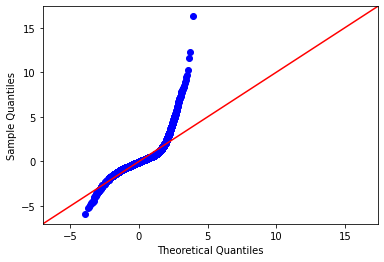

In [13]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

#### Perhaps a log transformation..

## MODEL 3

In [14]:
df_log = df

In [15]:
len(df_log[df_log['price'] > 2000000])

127

<AxesSubplot:>

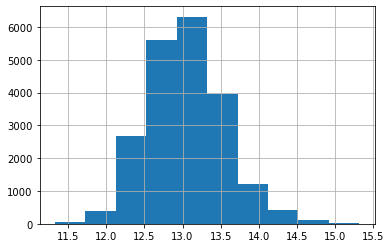

In [16]:
df_log['log_price'] = np.log(df_log.price)
df_log.log_price.hist()

In [17]:
df_log = df_log[df_log['price'] < 2000000]

In [18]:
outcome = 'log_price'
predictors = df_log.drop(['price','log_price'],axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [19]:
formula

'log_price~sqft_living+sqft_lot+sqft_basement+lat+long+bedrooms_2+bedrooms_3+bedrooms_4+bedrooms_5+bedrooms_6+bathrooms_1_5+bathrooms_1_75+bathrooms_2+bathrooms_2_25+bathrooms_2_5+bathrooms_2_75+bathrooms_3+bathrooms_3_25+bathrooms_3_5+bathrooms_3_75+bathrooms_4+bathrooms_4_25+floors_1_5+floors_2+floors_3+waterfront_1+view_1+view_2+view_3+view_4+condition_4+condition_5+grade_fair+grade_good+grade_excellent+yr_built_early_century+yr_built_mid_century+yr_built_modern+yr_built_post_modern+has_renovated_1'

In [20]:
model2 = ols(formula=formula,data=df_log).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1457.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:17:50   Log-Likelihood:                -576.07
No. Observations:               20610   AIC:                             1234.
Df Residuals:                   20569   BIC:                             1559.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -51.9952      1.957    -26.566      0.000     -55.831     -48.159
sqft_living                0.0002   4.48e-06     53.520      0.000       0.000       0.000
sqft_lot                4.573e-07   4.64e-08      9.859      0.000    3.66e-07    5.48e-07
sqft_basement          -4.495e-05   5.85e-06     -7.685      0.000   -5.64e-05   -3.35e-05
lat                        1.3867      0.013    104.070      0.000       1.361       1.413
long                       0.0133      0.015      0.879      0.380      -0.016       0.043
bedrooms_2                 0.0438      0.021      2.057      0.040       0.002       0.086
bedrooms_3                 0.0327      0.021      1.535      0.125      -0.009       0.074
bedrooms_4                 0.0192      0.022      0.886      0.376      -0.023       0.062
bedrooms_5                -0.0006      0.023     -0.025      0.980      -0.045       0.044
bedrooms_6                -0.0491      0.028     -1.753      0.080      -0.104       0.006
bathrooms_1_5              0.0285      0.008      3.417      0.001       0.012       0.045
bathrooms_1_75             0.0621      0.007      8.701      0.000       0.048       0.076
bathrooms_2                0.0673      0.008      8.454      0.000       0.052       0.083
bathrooms_2_25             0.0920      0.009     10.343      0.000       0.075       0.109
bathrooms_2_5              0.0882      0.009     10.252      0.000       0.071       0.105
bathrooms_2_75             0.1100      0.011     10.250      0.000       0.089       0.131
bathrooms_3                0.1046      0.012      8.405      0.000       0.080       0.129
bathrooms_3_25             0.1478      0.014     10.304      0.000       0.120       0.176
bathrooms_3_5              0.1561      0.014     11.215      0.000       0.129       0.183
bathrooms_3_75             0.1839      0.024      7.651      0.000       0.137       0.231
bathrooms_4                0.1263      0.027      4.711      0.000       0.074       0.179
bathrooms_4_25             0.1225      0.036      3.437      0.001       0.053       0.192
floors_1_5                 0.0120      0.007      1.675      0.094      -0.002       0.026
floors_2                   0.0046      0.006      0.744      0.457      -0.008       0.017
floors_3                  -0.0029      0.013     -0.231      0.817      -0.027       0.022
waterfront_1               0.3711      0.031     12.087      0.000       0.311       0.431
view_1                     0.1920      0.015     13.202      0.000       0.163       0.220
view_2                     0.1483      0.009     16.875      0.000       0.131       0.166
view_3                     0.2184      0.012     17.841      0.000       0.194       0.242
view_4                     0.3009      0.020     15.298      0.000       0.262  

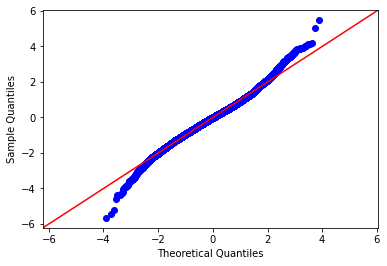

In [21]:
fig2 = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

In [22]:
y = df_log.log_price
X = df_log.drop(['price','log_price'],axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [25]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [26]:
y_hat_test_exp = np.exp(y_hat_test)

In [27]:
y_test_exp = np.exp(y_test)

In [28]:
y_hat_train_exp = np.exp(y_hat_train)

In [29]:
y_train_exp = np.exp(y_train)

In [30]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.06212788279226744
Test Mean Squarred Error: 0.06127225584280275


In [31]:
mse_train_exp = mean_squared_error(y_train_exp,y_hat_train_exp,squared=False)
mse_test_exp = mean_squared_error(y_test_exp,y_hat_test_exp,squared=False)
print('train', mse_train_exp)
print('test', mse_test_exp)

train 157669.94225882247
test 153145.45364839715


In [38]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X, vif))

[('sqft_living', 31.291892291439634),
 ('sqft_lot', 1.2290512971609413),
 ('sqft_basement', 2.834462887155972),
 ('lat', 119161.03204967901),
 ('long', 119120.40221065155),
 ('bedrooms_2', 19.22243173903263),
 ('bedrooms_3', 69.76056580060828),
 ('bedrooms_4', 50.27114178398659),
 ('bedrooms_5', 12.209547174361786),
 ('bedrooms_6', 2.6488425407599445),
 ('bathrooms_1_5', 1.5721878376540859),
 ('bathrooms_1_75', 2.4465980877212297),
 ('bathrooms_2', 1.9193137305720862),
 ('bathrooms_2_25', 2.5551697060606555),
 ('bathrooms_2_5', 6.287436857697523),
 ('bathrooms_2_75', 2.152481069797816),
 ('bathrooms_3', 1.7409109533668192),
 ('bathrooms_3_25', 1.7834714152161735),
 ('bathrooms_3_5', 2.157302500782724),
 ('bathrooms_3_75', 1.2371872972800557),
 ('bathrooms_4', 1.2170841095912914),
 ('bathrooms_4_25', 1.1470225938143355),
 ('floors_1_5', 1.5246471841945317),
 ('floors_2', 4.937292858959022),
 ('floors_3', 1.4269413487755345),
 ('waterfront_1', 1.3977616849365762),
 ('view_1', 1.040926295

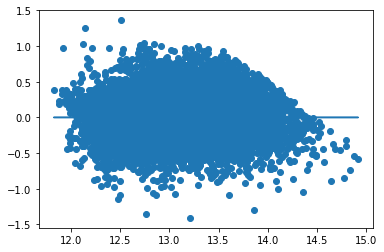

In [39]:
plt.scatter(model2.predict(X), model2.resid)
plt.plot(model2.predict(X), [0 for i in range(len(df_log))])

In [40]:
import folium

In [41]:
df_log.lat.min()

47.1559

In [42]:
df_log.lat.mean()

47.55949847646773

In [43]:
df_log.long.mean()

-122.21331722464825

In [44]:
kc_coordinates = (47.55949847646773,-122.21331722464825 )

In [45]:
kc_map = folium.Map(location=kc_coordinates)

In [46]:
kc_map

In [48]:
type(df1.groupby('zipcode').median()[['lat','long','price']])

pandas.core.frame.DataFrame

In [53]:
df1.price.values.max()

4490000.0

In [50]:
data = df1.groupby('zipcode').median()[['lat','long','price']].values.tolist()
data

[[47.3162, -122.272, 260000.0],
 [47.3063, -122.215, 235000.0],
 [47.3283, -122.308, 269500.0],
 [47.6209, -122.205, 1100000.0],
 [47.6034, -122.169, 768500.0],
 [47.5587, -122.147, 750652.5],
 [47.60835, -122.1425, 557500.0],
 [47.61600000000001, -122.117, 543475.0],
 [47.3359, -122.003, 355500.0],
 [47.7557, -122.202, 470000.0],
 [47.6742, -121.9115, 419000.0],
 [47.735749999999996, -121.9675, 404625.0],
 [47.2057, -121.999, 279000.0],
 [47.3085, -122.365, 269000.0],
 [47.5619, -121.901, 462500.0],
 [47.5321, -122.0495, 562500.0],
 [47.755449999999996, -122.244, 445500.0],
 [47.55955, -122.003, 564900.0],
 [47.371, -122.185, 282510.0],
 [47.40385, -122.188, 288200.0],
 [47.3733, -122.285, 250000.0],
 [47.68385, -122.1875, 675000.0],
 [47.72195, -122.2125, 445000.0],
 [47.3639, -122.033, 342250.0],
 [47.6242, -122.235, 1760000.0],
 [47.5607, -122.225, 989900.0],
 [47.3666, -122.115, 294000.0],
 [47.47880000000001, -121.769, 412500.0],
 [47.6834, -122.116, 615000.0],
 [47.6824, -122.02

In [52]:
from folium.plugins import HeatMap
HeatMap(data = data).add_to(kc_map)
display(kc_map)